# EDA

In [2]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Preparing the datasets

In [29]:
#Making the desired dataframe for each variable
variable_list = ['pct_blk', 'medhouseholdincome', 'pct_owner_occ', 'hispanic', 'education']
# Initialize an empty dictionary to store the modified dataframes
df_dict = {var: [] for var in variable_list}

for variable in variable_list:
    
    for year in list(range(2011, 2019)):

        file__prefix = '/n/dominici_nsaph_l3/Lab/projects/analytic/census_acs5/'
        file_name = 'census_' + str(year)
        file_suffix = '.parquet'
        file_path = file__prefix + file_name + file_suffix
        df = pd.read_parquet(file_path)
        df = df[['zcta', variable]]
        df.rename(columns={variable: f'{year}_{variable}'}, inplace=True)  # Rename 'population' column
        df_dict[variable].append(df)

# Merge the modified dataframes on the 'zcta' column
result_dfs = {}  # Start with the first modified dataframe
for var, dfs in df_dict.items():
    result_df = dfs[0]
    for df in dfs[1:]:
        result_df = result_df.merge(df, on='zcta', how='outer')  # Merge on 'zcta'
    result_dfs[var] = result_df




In [31]:
result_dfs['education']

,zcta,2011_education,2012_education,2013_education,2014_education,2015_education,2016_education,2017_education,2018_education
0,00601,0.655537,0.654966,0.668072,0.657175,0.627847,0.631130,0.617881,0.612184
1,00602,0.710707,0.727977,0.717907,0.699527,0.686258,0.671515,0.629362,0.601361
2,00603,0.657433,0.623884,0.592233,0.573404,0.539052,0.519769,0.507708,0.502327
3,00606,0.773386,0.661453,0.674419,0.682523,0.654691,0.653918,0.710403,0.666667
4,00610,0.722209,0.670446,0.660929,0.607391,0.594111,0.609722,0.595890,0.561373
...,...,...,...,...,...,...,...,...,...
33115,99923,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
33116,99925,0.250000,0.189474,0.240385,0.183486,0.133333,0.160305,0.147541,0.064220
33117,99926,0.217687,0.267123,0.280303,0.268293,0.207317,0.130719,0.105000,0.100478
33118,99927,0.346154,0.318182,0.333333,0.000000,0.000000,NaN,NaN,NaN


## Summary - Coverage

In [16]:
#variable, total zcta, total_zcta_coverage_perc, 2009 and all variables coverage

coverage_df = {'variable_name':[], 'total_zcta':[], '2011_null':[], '2012_null':[], '2013_null':[], '2014_null':[], '2015_null':[], '2016_null':[], '2017_null':[], '2018_null':[]}

for var, df in result_dfs.items():
    coverage_df['variable_name'].append(var)
    coverage_df['total_zcta'].append(df['zcta'].nunique())
    for year in list(range(2011, 2019)):
        df_column_name = str(year)+ '_' + var
        coverage_df_column_name = str(year) + '_' + 'null'
        coverage_df[coverage_df_column_name].append(df[df_column_name].isnull().sum())

pd.DataFrame(coverage_df)

,variable_name,total_zcta,2011_null,2012_null,2013_null,2014_null,2015_null,2016_null,2017_null,2018_null
0,pct_blk,33120,369,337,336,306,310,321,317,321
1,medhouseholdincome,33120,0,0,0,0,0,0,0,0
2,pct_owner_occ,33120,615,589,596,573,571,580,573,578
3,hispanic,33120,369,337,336,306,310,321,317,321
4,education,33120,1199,1138,1103,1034,1024,1011,1046,1019


# Histograms 

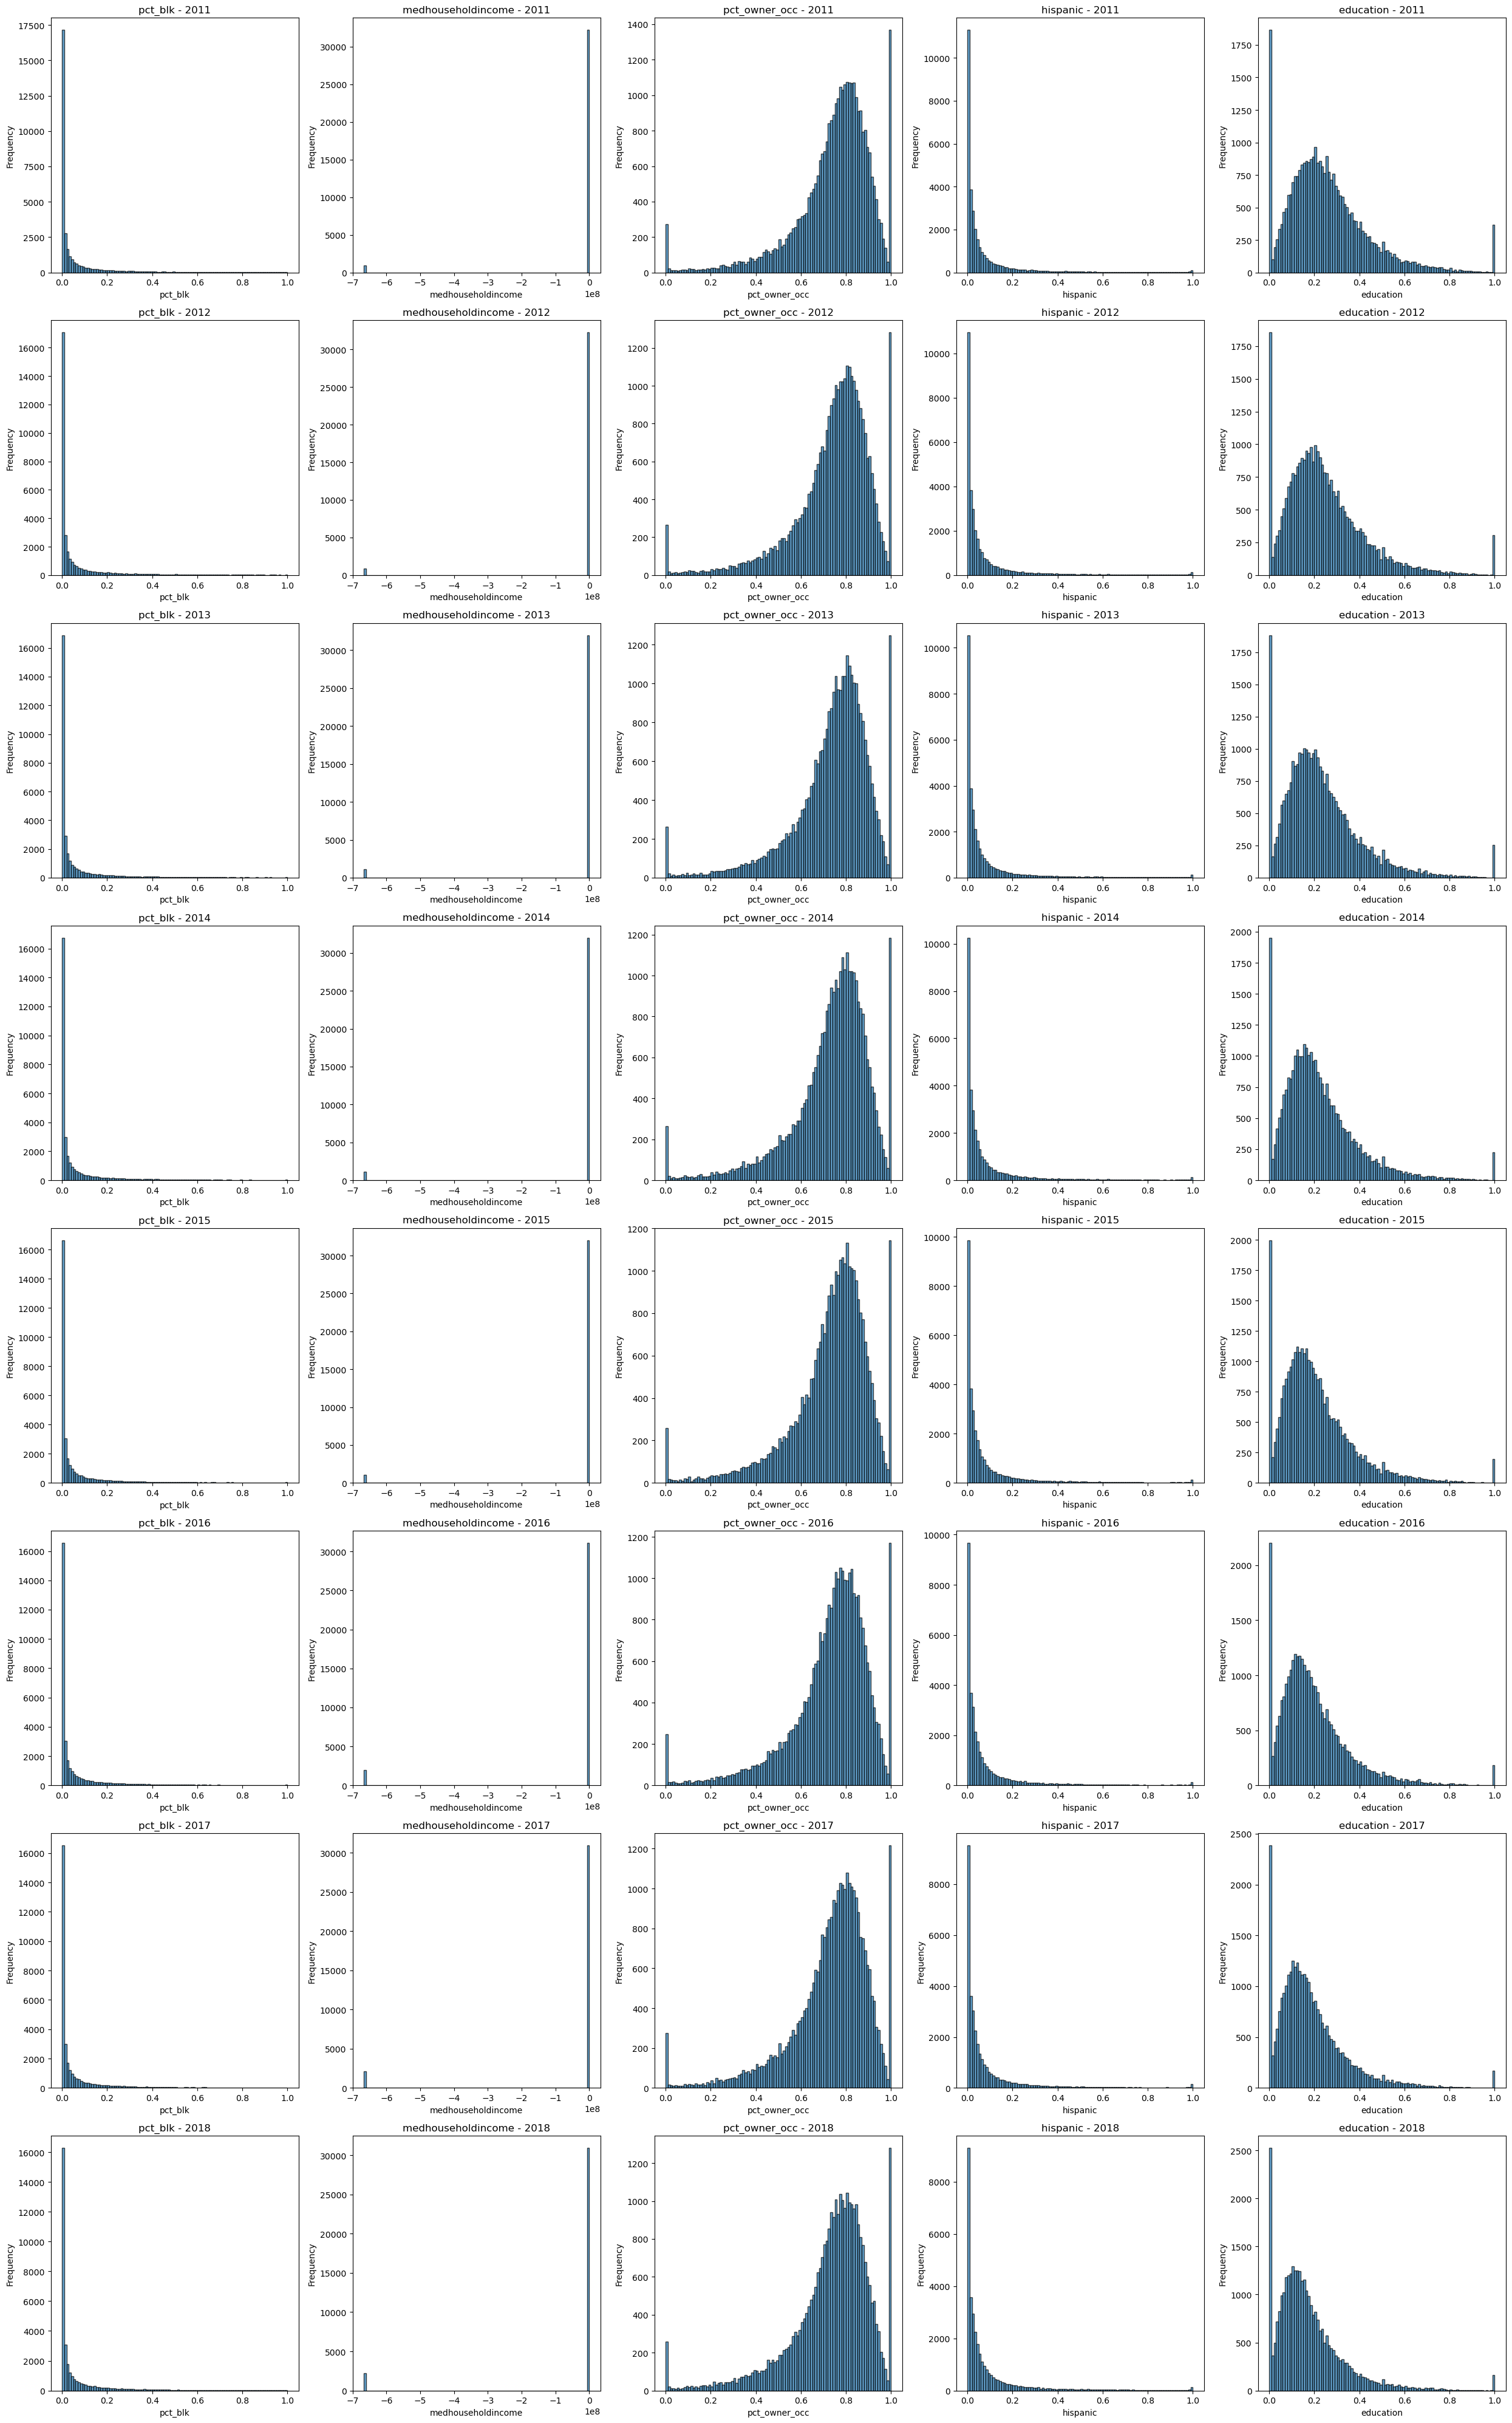

In [32]:
# List of dataframes
#dataframes = [df1, df2, df3]  # Add your dataframes here

# Extract the years from the column names
years = [str(year) for year in range(2011, 2019)]

# Calculate the number of rows and columns for the grid based on the number of years
num_rows = len(years)
num_cols = len(result_dfs)

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))

# Iterate through each dataframe
for row, year in enumerate(years):
    # Iterate through each year and create a histogram for the corresponding population column
    for col, df_dict in enumerate(result_dfs):
        df = result_dfs[df_dict]
        ax = axes[row, col]
        col_name = f'{year}_{df_dict}'
        ax.hist(df[col_name], bins=100, edgecolor='black', alpha=0.7)
        ax.set_title(f'{df_dict} - {year}')
        ax.set_xlabel(f'{df_dict}')
        ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

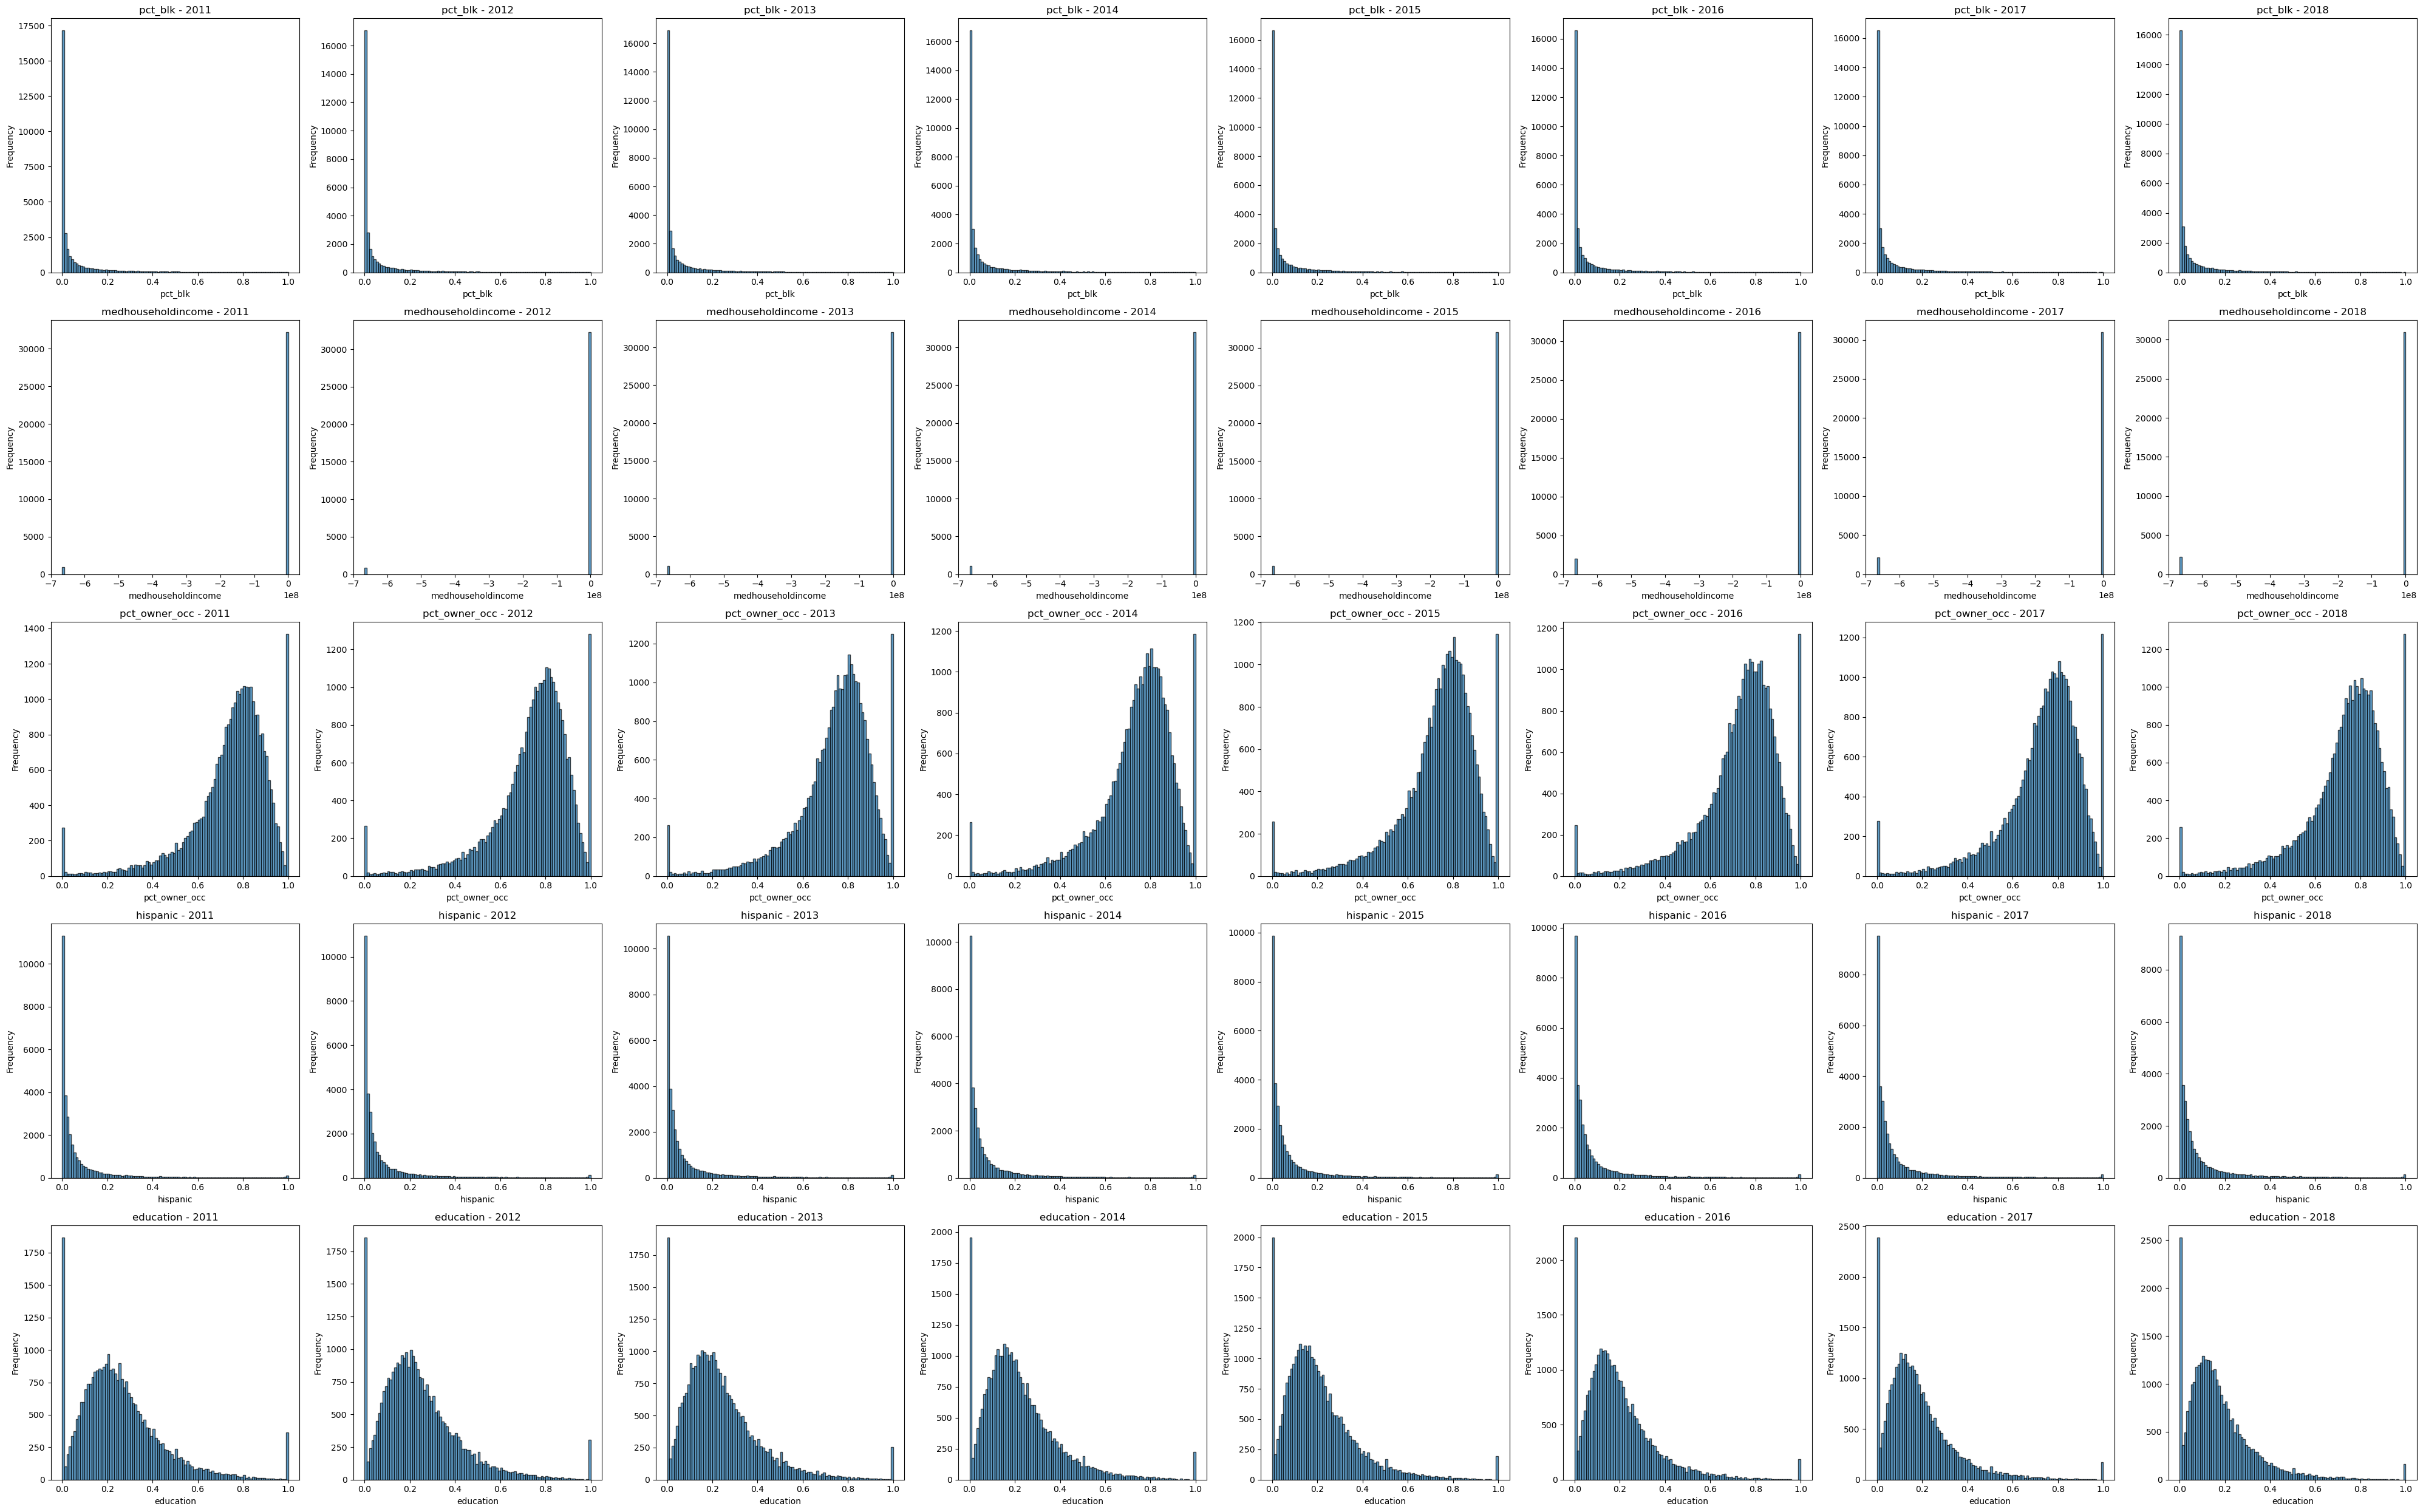

In [33]:
# Extract the years from the column names
years = [str(year) for year in range(2011, 2019)]

# Calculate the number of rows and columns for the grid based on the number of years
num_rows = len(result_dfs)
num_cols = len(years)

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))

# Iterate through each dataframe
for row, df_dict in enumerate(result_dfs):
    # Iterate through each year and create a histogram for the corresponding population column
    df = result_dfs[df_dict]
    for col, year in enumerate(years):
        ax = axes[row, col]
        col_name = f'{year}_{df_dict}'
        ax.hist(df[col_name], bins=100, edgecolor='black', alpha=0.7)
        ax.set_title(f'{df_dict} - {year}')
        ax.set_xlabel(f'{df_dict}')
        ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Histogram - Boxplots

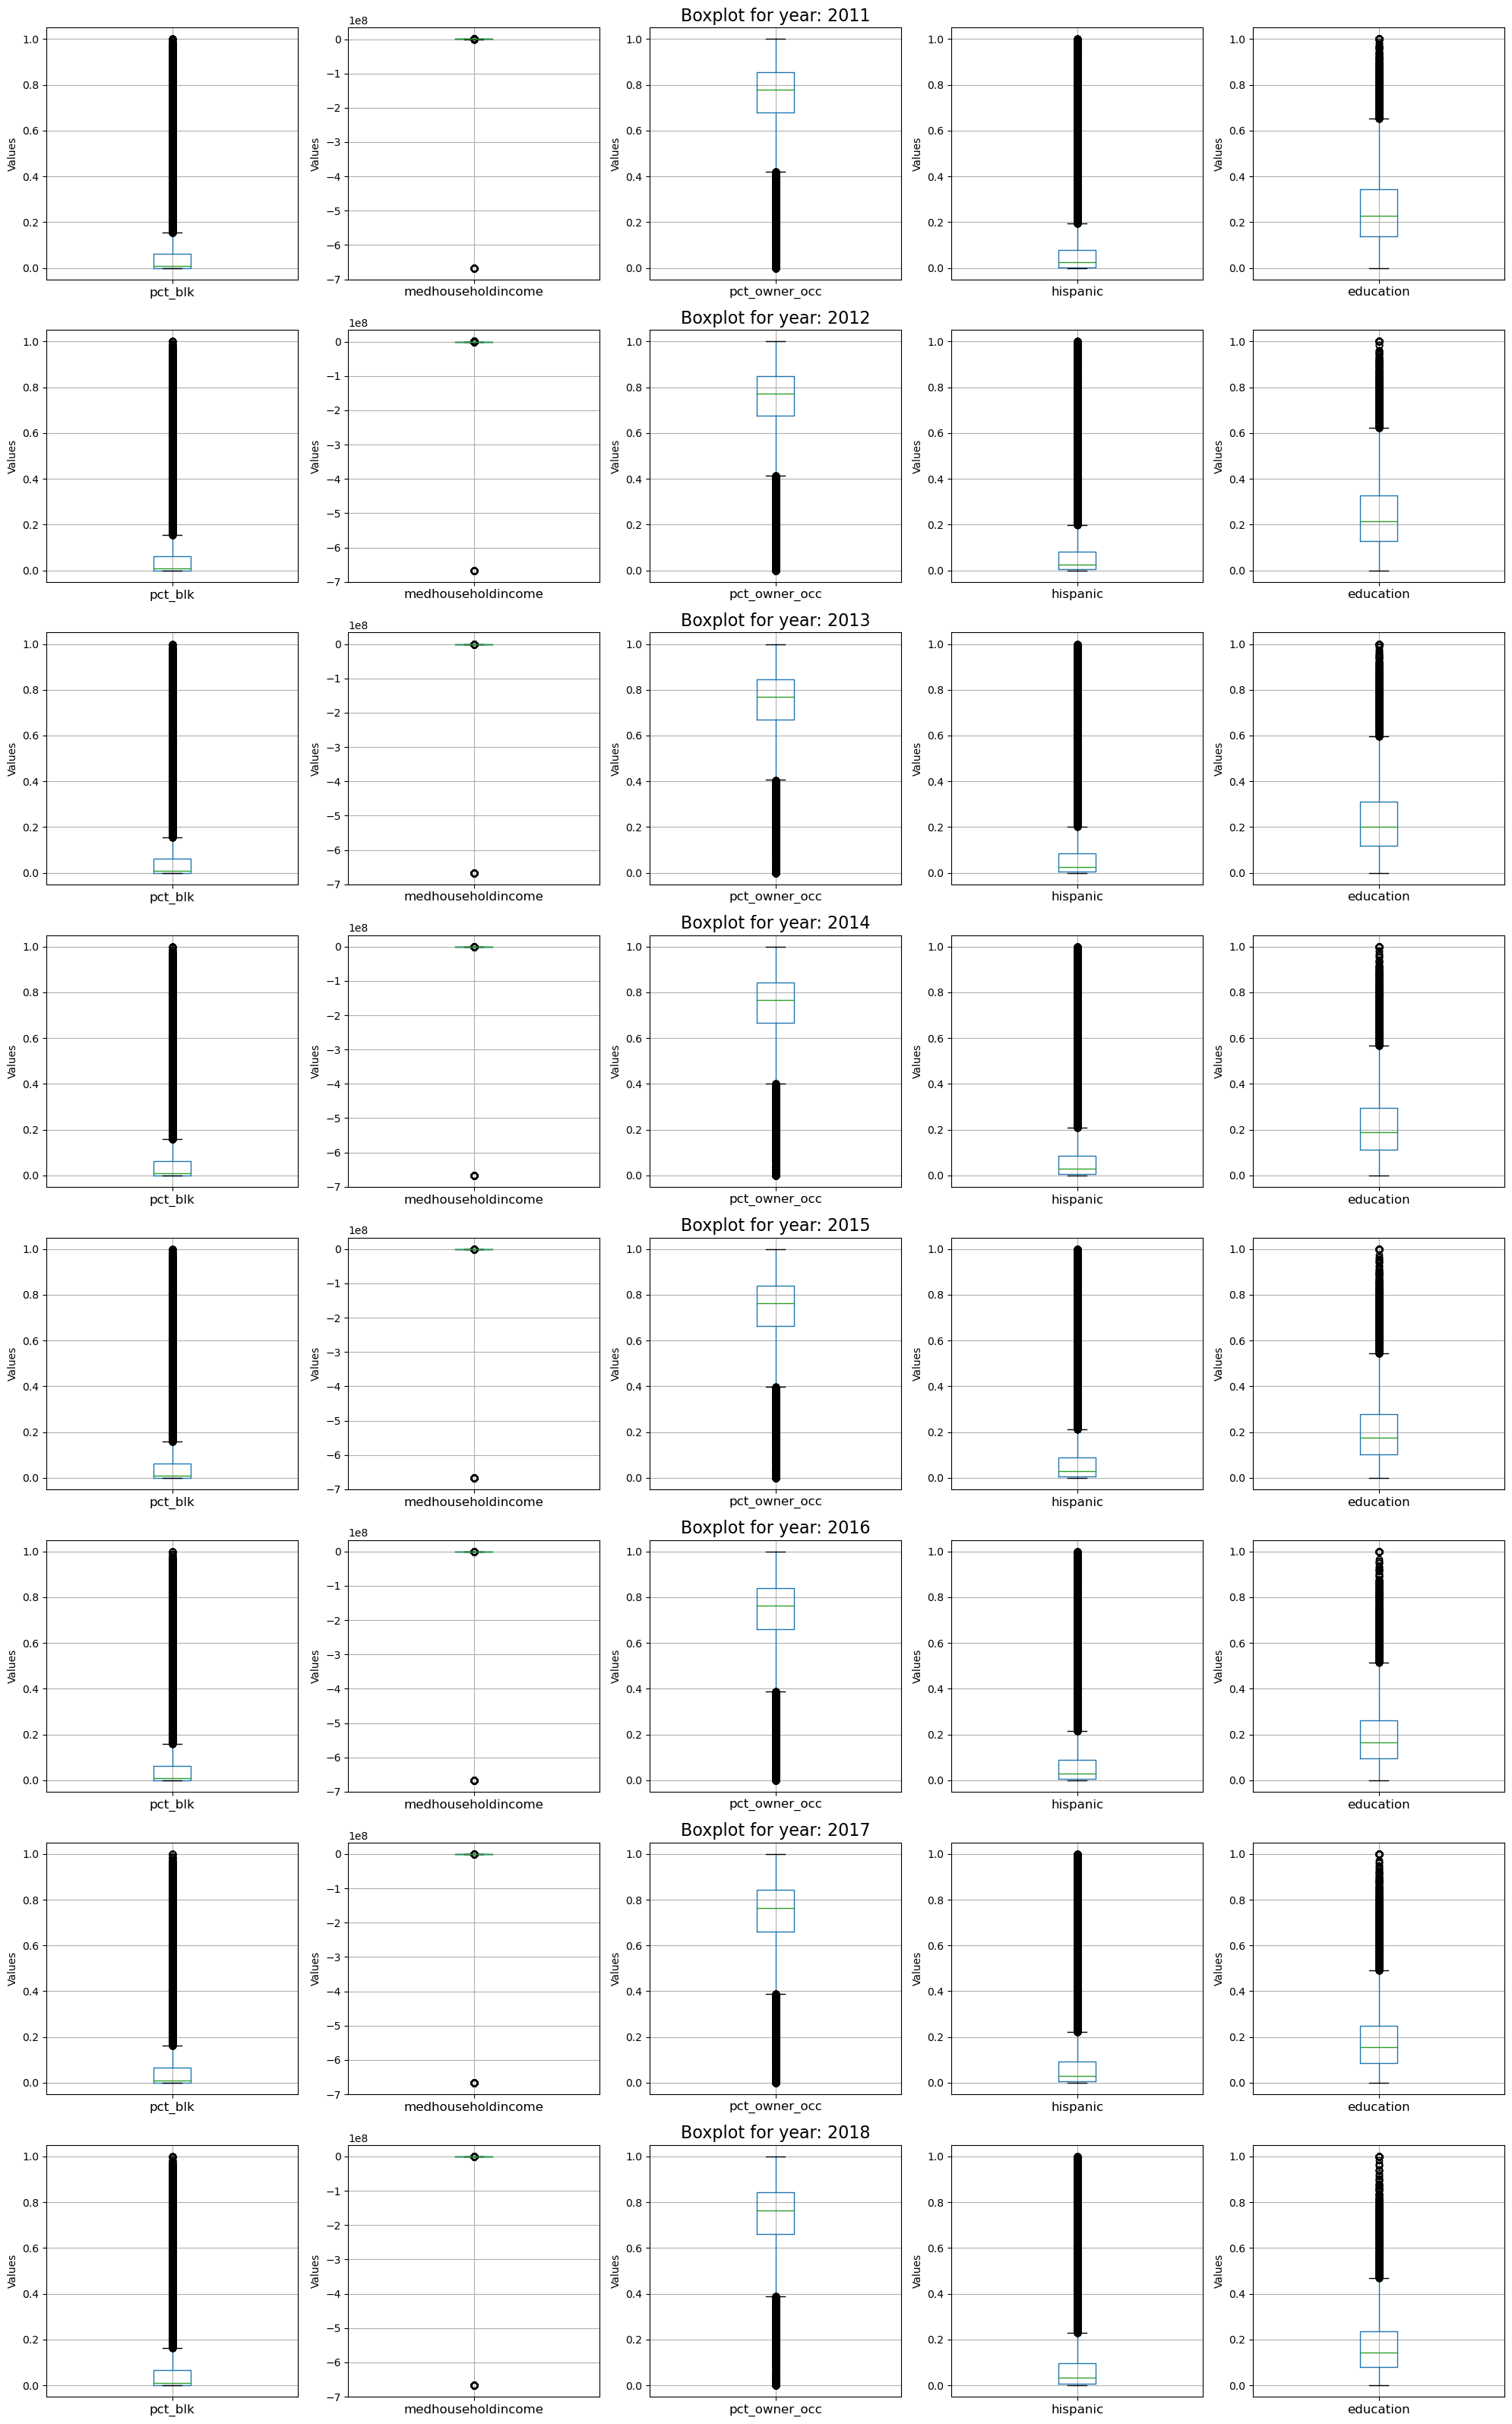

In [27]:
# Calculate the number of rows and columns for the grid
num_rows = len(list(range(2011,2019)))
num_cols = 5

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 4))

# Iterate through each dataframe and create a box plot
for row, year in enumerate(list(range(2011,2019))):
    file__prefix = '/n/dominici_nsaph_l3/Lab/projects/analytic/census_acs5/'
    file_name = 'census_' + str(year)
    file_suffix = '.parquet'
    file_path = file__prefix + file_name + file_suffix
    df = pd.read_parquet(file_path)
    df.drop(columns=['zcta'], inplace=True)
    for col, column in enumerate(df.columns):
        col_midpoint = num_cols // 2
        title_ax = axes[row, col_midpoint]
        ax = axes[row,col]
        df.dropna().boxplot(ax=ax, column=column)
        # Use the DataFrame title for the first column plot in the row
        if col == 0:
            title_ax.set_title(f'Boxplot for year: {year}', fontsize=16, ha='center')
            #title_obj.set_position([0.5, 0.95]) 
        ax.set_ylabel('Values')
        ax.tick_params(axis='x', which='both', labelsize=12)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()